### Feature Engineering & Data Visuals
- Build out quanitative and qualitative data
- Build out datetime data
- Input data into Pandas Dataframe
- Compute Descriptive Statistics
- Generate Line plot to visualize quantitative data accross time
- Generate Scatterplot to visualize quantitative data accross time
- Generate Kernel Density Plot to visualize quantitative data accross time
- Compute the autocorrelation of a quantitative feature

Import required libraries

In [1]:
import numpy as np # import numpy for high level numerical python
import pandas as pd # import pandas library dataframe
import random # import random module for implementing pseudo-random number generators for various distributions

from datetime import datetime, timedelta # import datetime module

from statsmodels.graphics.tsaplots import plot_acf # autocorrealtion function 

# visualization values
import matplotlib.pyplot as plt
import seaborn as sns

Build Quantitative and Qualitative Data

In [2]:
# to initialize multiple lists (data structures)
X1, X2, X3, X4, X5, categories = ([] for i in range(6))

# Initiate for loop to generate random data
for n in range(0,2000): # range method - (start, stop, step)
    number1 = random.randint(0,500) # randint () method returns an integer number selected element from the specified range
    X1.append(number1)
    number2 = random.randint(0,5000)
    X2.append(number2)
    number3 = random.randint(2500,7500)
    X3.append(number3)
    number4 = random.randint(0,3500)
    X4.append(number4)
    number5 = random.randint(0,250)
    X5.append(number5)
    number6 = random.randint(1,8000)
    categories.append(number6)

Build DateTime data
- This must be the exact same range in order to input all data into pandas dataframe

In [3]:
# Define start and end dates
start_date = datetime(2017, 1, 30)
end_date = datetime(2022, 7, 22)
 
# Initialize an empty list
date_list = []
 
# Loop through the range of dates and append to the list
while start_date <= end_date:
    date_list.append(start_date)
    start_date += timedelta(days=1)

Build Pandas Dataframe

In [4]:
# Create DataFrame including all above features + randomly generated data
df = pd.DataFrame ({'Date':date_list,'X1':X1,'X2':X2,'X3':X3,'X4':X4,'X5':X5,'Categories':categories})
# Create a copy of original dataframe ...(good practice)
original_dataframe = df.copy(deep = True)

# Build categorical data in df
range = [0,300,1850,2500,5000,np.inf] # note -> list data strucuture ORDERED
category_names = ['Amazon','Google','Microsoft','BabylonAI','BenevelonAI'] 
df['Categories'] = pd.cut(df['Categories'], bins = range, labels = category_names)

# Dataframe
print(df.head()) # head of dataframe
print(df.describe()) # descriptional statistics (data type objects included)
print(df.shape) # shape of dataframe
print(df.info()) # dataframe info

        Date   X1    X2    X3    X4   X5   Categories
0 2017-01-30  281  3134  5102   420  170  BenevelonAI
1 2017-01-31  370  1492  3006   462    3       Google
2 2017-02-01  361   492  6846  1709  179    BabylonAI
3 2017-02-02   75     9  4046  2152  136       Google
4 2017-02-03  387  4503  2600   374   13    BabylonAI
                X1           X2           X3           X4           X5
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean    249.077000  2543.289000  5074.467000  1720.774500   124.147000
std     142.841012  1464.925519  1440.332342  1007.203563    72.590923
min       0.000000     1.000000  2505.000000     1.000000     0.000000
25%     127.000000  1264.750000  3832.500000   865.250000    61.000000
50%     253.000000  2535.500000  5121.000000  1685.000000   124.500000
75%     370.250000  3831.000000  6340.750000  2579.000000   185.250000
max     500.000000  4999.000000  7500.000000  3500.000000   250.000000
(2000, 7)
<class 'pandas.core.frame.D

In [24]:
df.head()

,Date,X1,X2,X3,X4,X5,Categories
0,2017-01-30,281,3134,5102,420,170,BenevelonAI
1,2017-01-31,370,1492,3006,462,3,Google
2,2017-02-01,361,492,6846,1709,179,BabylonAI
3,2017-02-02,75,9,4046,2152,136,Google
4,2017-02-03,387,4503,2600,374,13,BabylonAI


#### Line Plot

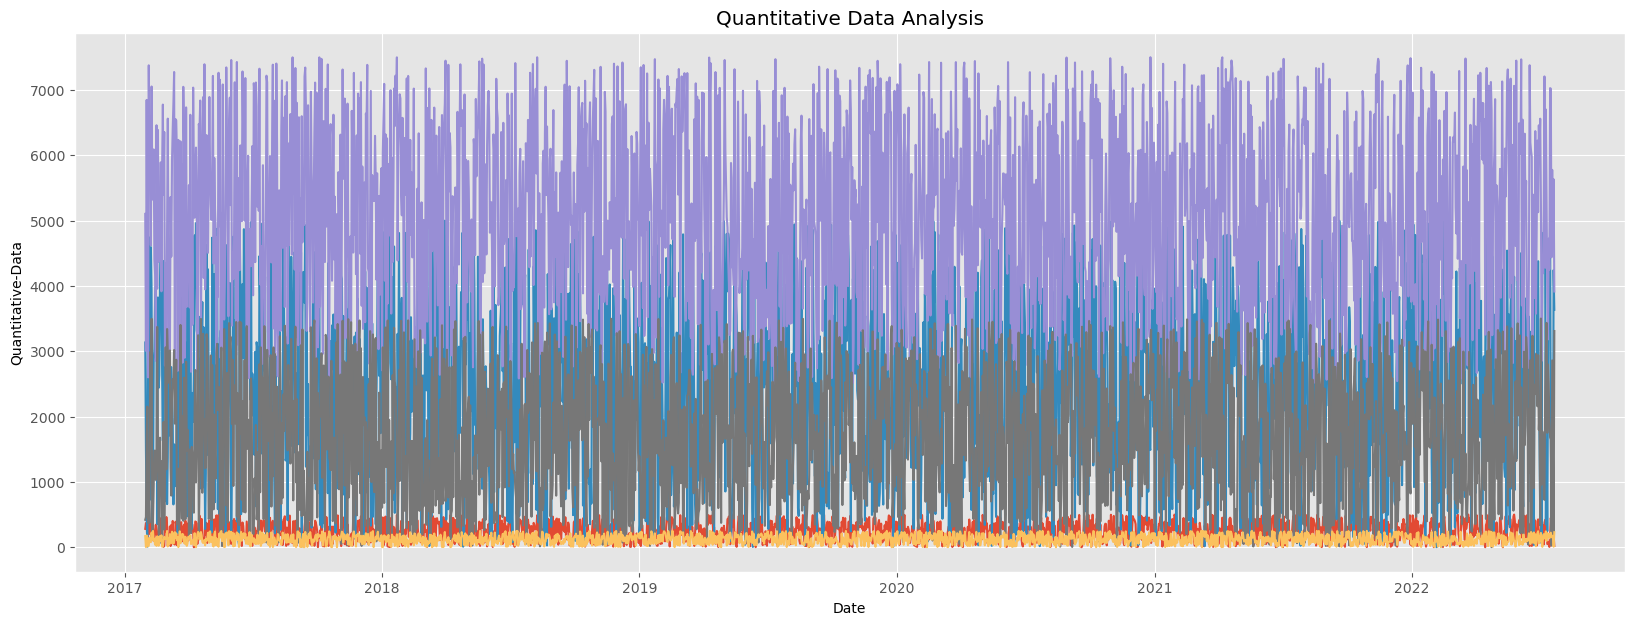

In [21]:
# plot settings (pre-defined)
plt.style.use('ggplot')
fig= plt.figure(figsize=(20,7))
plt.title("Quantitative Data Analysis")
plt.xlabel("Date")
plt.ylabel("Quantitative-Data")

# generate line plot
plt.plot(df['Date'],X1)
plt.plot(df['Date'],X2)
plt.plot(df['Date'],X3)
plt.plot(df['Date'],X4)
plt.plot(df['Date'],X5)
#
plt.show()

#### Scatterplot
A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

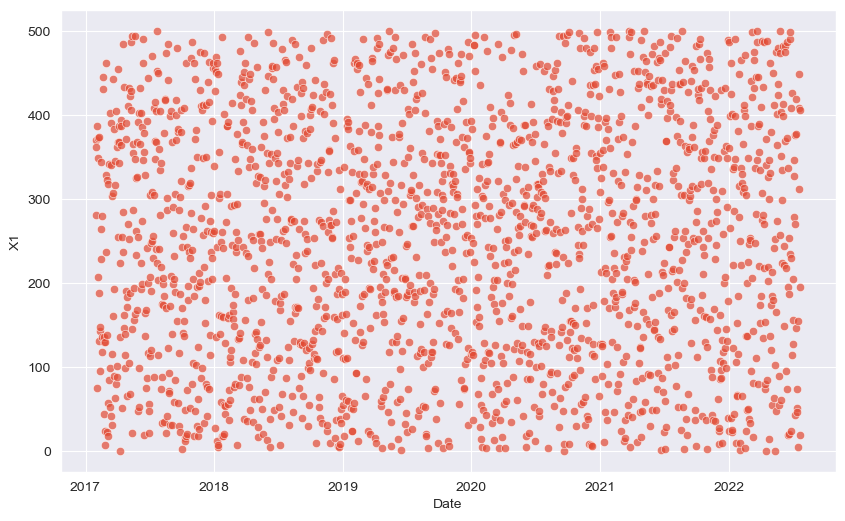

In [42]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.scatterplot(x = "Date", y = "X1", data = df, alpha = 0.7) # hue adding a third variable into scatterplot
plt.show()

#### Kernel Density Plot
A kernel density plot is a type of plot that displays the distribution of values in a dataset using one continuous curve. A kernel density plot is similar to a histogram, but it’s even better at displaying the shape of a distribution since it isn’t affected by the number of bins used in the histogram.

<Axes: xlabel='X1', ylabel='Density'>

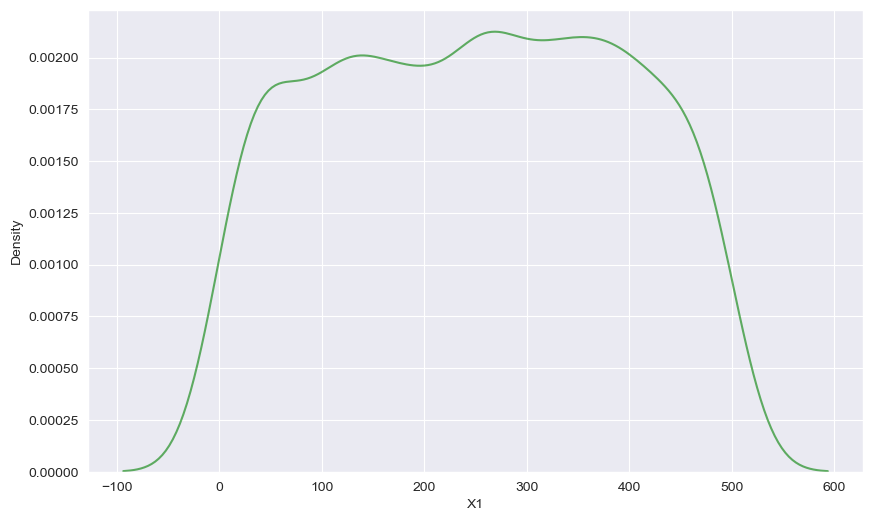

In [41]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.kdeplot(df['X1'], color = 'g', alpha = 0.6)

#### Autocorrelation Analysis
Enable user to isolate specific data of interest and compute the auto-correlation function.

Autocorrelation

Autocorrelation, also termed as serial correlation, refers to the degree of CORRELATION of the same feature between two successive time intervals. Similarily to correlation the value of autocorrelation ranges from -1 to 1. A value between -1 and 0 represents negative autocorrelation. A value between 0 and 1 represents positive autocorrelation.

Autocorrelation gives information about the trend within historical the data. Autocorrelation analysis measures the relationship of the observations between the different points in time, and thus seeks for a pattern or trend over the time series.

This is a useful tool for time series data analysis.

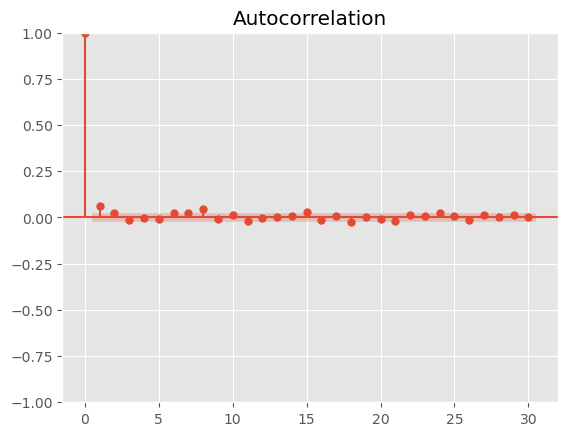

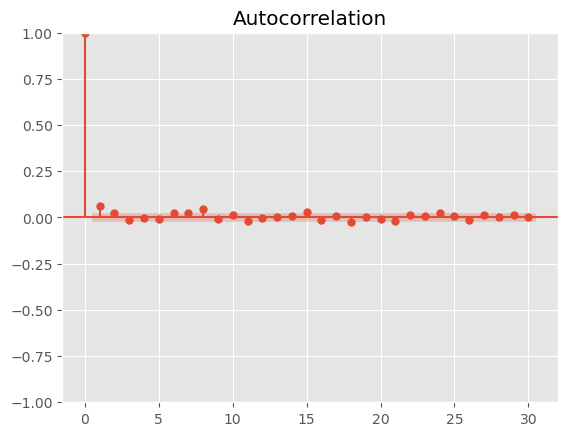

In [23]:
# autocorrelation function
plot_acf(df['X1'], lags = 30, alpha = 0.3)